In [5]:
import json
from pathlib import Path

data_path = Path("../data/result_dataset.jsonl")

data = []
with data_path.open("r") as f:
    for line in f:
        data.append(json.loads(line))

In [6]:
len(data)

1878075

In [13]:
data[0]

{'source_dataset': 'grit_detcap_en.jsonl',
 'source_id': '44303',
 'image': 's3://public-dataset/GRIT/data/00001/84193b62c7c7d173.jpg',
 'objs': {'photo courtesy': [[0.007, 0.006, 0.994, 0.987]]},
 'num_objs': 1,
 'num_bbox': 1}

num_objs Statistics:
  Count: 1878075
  Mean: 1.71
  Median: 1.00
  Min: 1
  Max: 15
  Std Dev: 1.18

num_bbox Statistics:
  Count: 1878075
  Mean: 2.24
  Median: 1.00
  Min: 1
  Max: 61
  Std Dev: 2.09


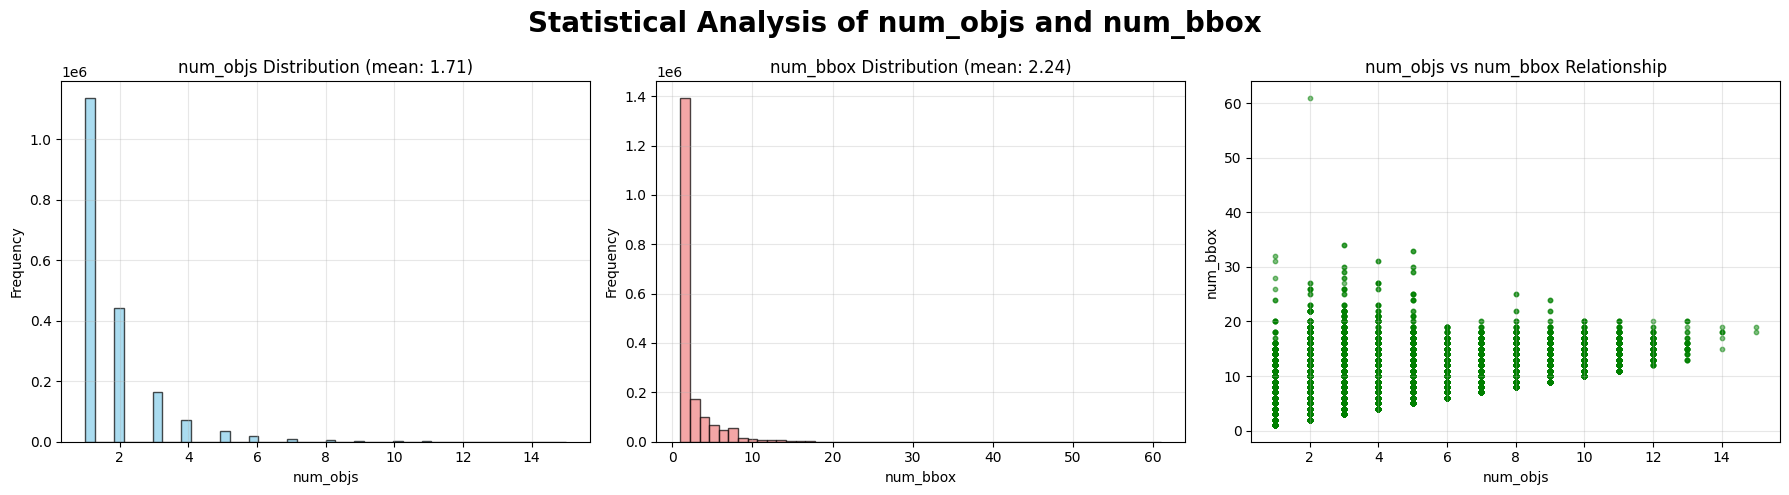


Top 10 Most Common num_objs Values:
  1: 1134363 (60.40%)
  2: 440415 (23.45%)
  3: 162659 (8.66%)
  4: 69859 (3.72%)
  5: 35695 (1.90%)
  6: 17609 (0.94%)
  7: 9434 (0.50%)
  8: 4554 (0.24%)
  9: 2112 (0.11%)
  10: 881 (0.05%)

Top 10 Most Common num_bbox Values:
  1: 1014558 (54.02%)
  2: 376652 (20.06%)
  3: 170990 (9.10%)
  4: 99264 (5.29%)
  5: 66741 (3.55%)
  6: 47340 (2.52%)
  7: 32511 (1.73%)
  8: 23359 (1.24%)
  9: 16364 (0.87%)
  10: 11258 (0.60%)


In [15]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

# Extract num_objs and num_bbox
num_objs_list = [item["num_objs"] for item in data]
num_bbox_list = [item["num_bbox"] for item in data]

# Basic statistics
print("=" * 50)
print("num_objs Statistics:")
print(f"  Count: {len(num_objs_list)}")
print(f"  Mean: {np.mean(num_objs_list):.2f}")
print(f"  Median: {np.median(num_objs_list):.2f}")
print(f"  Min: {np.min(num_objs_list)}")
print(f"  Max: {np.max(num_objs_list)}")
print(f"  Std Dev: {np.std(num_objs_list):.2f}")
print()
print("num_bbox Statistics:")
print(f"  Count: {len(num_bbox_list)}")
print(f"  Mean: {np.mean(num_bbox_list):.2f}")
print(f"  Median: {np.median(num_bbox_list):.2f}")
print(f"  Min: {np.min(num_bbox_list)}")
print(f"  Max: {np.max(num_bbox_list)}")
print(f"  Std Dev: {np.std(num_bbox_list):.2f}")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(
    "Statistical Analysis of num_objs and num_bbox", fontsize=20, fontweight="bold"
)

# 1. num_objs histogram
axes[0].hist(num_objs_list, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
axes[0].set_xlabel("num_objs")
axes[0].set_ylabel("Frequency")
axes[0].set_title(f"num_objs Distribution (mean: {np.mean(num_objs_list):.2f})")
axes[0].grid(True, alpha=0.3)

# 2. num_bbox histogram
axes[1].hist(num_bbox_list, bins=50, color="lightcoral", edgecolor="black", alpha=0.7)
axes[1].set_xlabel("num_bbox")
axes[1].set_ylabel("Frequency")
axes[1].set_title(f"num_bbox Distribution (mean: {np.mean(num_bbox_list):.2f})")
axes[1].grid(True, alpha=0.3)

# 3. num_objs vs num_bbox scatter plot
axes[2].scatter(num_objs_list, num_bbox_list, alpha=0.5, s=10, color="green")
axes[2].set_xlabel("num_objs")
axes[2].set_ylabel("num_bbox")
axes[2].set_title("num_objs vs num_bbox Relationship")
axes[2].grid(True, alpha=0.3)

# # 4. num_objs cumulative distribution
# sorted_objs = np.sort(num_objs_list)
# cumulative_objs = np.arange(1, len(sorted_objs) + 1) / len(sorted_objs) * 100
# axes[1, 0].plot(sorted_objs, cumulative_objs, color='blue', linewidth=2)
# axes[1, 0].set_xlabel('num_objs')
# axes[1, 0].set_ylabel('Cumulative Percentage (%)')
# axes[1, 0].set_title('num_objs Cumulative Distribution')
# axes[1, 0].grid(True, alpha=0.3)

# # 5. num_bbox cumulative distribution
# sorted_bbox = np.sort(num_bbox_list)
# cumulative_bbox = np.arange(1, len(sorted_bbox) + 1) / len(sorted_bbox) * 100
# axes[1, 1].plot(sorted_bbox, cumulative_bbox, color='red', linewidth=2)
# axes[1, 1].set_xlabel('num_bbox')
# axes[1, 1].set_ylabel('Cumulative Percentage (%)')
# axes[1, 1].set_title('num_bbox Cumulative Distribution')
# axes[1, 1].grid(True, alpha=0.3)

# # 6. Box plot comparison
# box_data = [num_objs_list, num_bbox_list]
# bp = axes[1, 2].boxplot(box_data, labels=['num_objs', 'num_bbox'], patch_artist=True)
# bp['boxes'][0].set_facecolor('skyblue')
# bp['boxes'][1].set_facecolor('lightcoral')
# axes[1, 2].set_ylabel('Value')
# axes[1, 2].set_title('num_objs and num_bbox Box Plot Comparison')
# axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Display top 10 most common num_objs and num_bbox values
print("\nTop 10 Most Common num_objs Values:")
objs_counter = Counter(num_objs_list)
for value, count in objs_counter.most_common(10):
    print(f"  {value}: {count} ({count / len(num_objs_list) * 100:.2f}%)")

print("\nTop 10 Most Common num_bbox Values:")
bbox_counter = Counter(num_bbox_list)
for value, count in bbox_counter.most_common(10):
    print(f"  {value}: {count} ({count / len(num_bbox_list) * 100:.2f}%)")

In [16]:
num_item_1_bbox_1 = 0
for item in data:
    if item["num_objs"] == 1 and item["num_bbox"] == 1:
        num_item_1_bbox_1 += 1
print(f"num_item_1_bbox_1: {num_item_1_bbox_1}")

num_item_1_bbox_1: 1014558
